Beginning of data analysis project for magnetar brewing  
Focused on user review analysis

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [31]:
df = pd.read_csv("beer_reviews.csv")

In [32]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


## Clean-up

In [34]:
for col in df.columns:
    print(f"# of null values in {col}: {len(df[df[col].isnull()])}")

# of null values in brewery_id: 0
# of null values in brewery_name: 15
# of null values in review_time: 0
# of null values in review_overall: 0
# of null values in review_aroma: 0
# of null values in review_appearance: 0
# of null values in review_profilename: 348
# of null values in beer_style: 0
# of null values in review_palate: 0
# of null values in review_taste: 0
# of null values in beer_name: 0
# of null values in beer_abv: 67785
# of null values in beer_beerid: 0


Don't really care about null profile names or brewery names, but null abv values can problematic

In [35]:
df[df["brewery_name"].isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651565,1193,NaN,1301022066,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659293,1193,NaN,1290107698,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659299,1193,NaN,1289077001,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659300,1193,NaN,1289851033,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659301,1193,NaN,1289158632,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659302,1193,NaN,1289590065,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659303,1193,NaN,1298078926,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659304,1193,NaN,1292423271,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,1193,NaN,1289329962,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391043,27,NaN,1020244856,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


In [36]:
print(df[df["beer_beerid"] == 63324].to_string())

        brewery_id brewery_name  review_time  review_overall  review_aroma  review_appearance review_profilename                  beer_style  review_palate  review_taste                                            beer_name  beer_abv  beer_beerid
659303        1193          NaN   1298078926             3.0           3.0                3.0         Ochsenblut  Keller Bier / Zwickel Bier            2.0           3.0  Engel Keller Dunkel  WRONG BREWERY SEE CRAILSHEIMER       5.3        63324
659304        1193          NaN   1292423271             4.5           4.0                4.0         Dentist666  Keller Bier / Zwickel Bier            4.0           4.5  Engel Keller Dunkel  WRONG BREWERY SEE CRAILSHEIMER       5.3        63324
659305        1193          NaN   1289329962             3.5           3.5                4.0             dqrull  Keller Bier / Zwickel Bier            4.0           4.0  Engel Keller Dunkel  WRONG BREWERY SEE CRAILSHEIMER       5.3        63324


In [37]:
df[df["brewery_name"] == "Crailsheimer"]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


Given large size of dataset, safe to drop null values

In [38]:
df_trim = df.dropna()
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB


In [39]:
len(df_trim) / len(df)

0.9570557173956614

Now to check for duplicated reviews

In [40]:
columns = df_trim.columns
columns = columns.delete(2) # drop review_time from criteria for duplicate rows
df_trim[df_trim.duplicated(columns, keep=False)]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1637,1454,Broad Ripple Brew Pub,1189969120,4.5,3.5,3.5,danielocean03,Märzen / Oktoberfest,4.0,3.5,Oktoberfest,5.50,13289
1639,1454,Broad Ripple Brew Pub,1160959471,4.5,3.5,3.5,danielocean03,Märzen / Oktoberfest,4.0,3.5,Oktoberfest,5.50,13289
10063,5049,Bath Ales Ltd,1220295894,4.0,3.5,4.0,wl0307,English Bitter,4.0,4.0,Barnstormer,4.50,13084
10064,5049,Bath Ales Ltd,1209506236,4.0,3.5,4.0,wl0307,English Bitter,4.0,4.0,Barnstormer,4.50,13084
10570,365,Pike Pub & Brewery,1282765789,5.0,4.5,4.0,Offa,American Pale Ale (APA),4.5,4.5,Pike Pale Ale,5.30,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584107,41,Brouwerij Corsendonk,1026396463,4.0,4.5,4.0,goindownsouth,Dubbel,4.0,4.0,Corsendonk Pater / Abbey Brown Ale,7.50,138
1585814,3835,Drake's Brewing Co.,1155698759,4.5,4.0,4.0,rayjay,Russian Imperial Stout,4.5,4.0,Drake's Drakonic Imperial Stout,8.75,12172
1585815,3835,Drake's Brewing Co.,1153800298,4.5,4.0,4.0,rayjay,Russian Imperial Stout,4.5,4.0,Drake's Drakonic Imperial Stout,8.75,12172
1586580,14359,The Defiant Brewing Company,1206208673,5.0,4.5,4.5,EPseja,Irish Dry Stout,4.5,4.5,O'Defiant Stout,5.50,36388


Change to keep="first" and then drop duplicates!

In [41]:
df_trim = df_trim.drop_duplicates(columns, keep="first")
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517728 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1517728 non-null  int64  
 1   brewery_name        1517728 non-null  object 
 2   review_time         1517728 non-null  int64  
 3   review_overall      1517728 non-null  float64
 4   review_aroma        1517728 non-null  float64
 5   review_appearance   1517728 non-null  float64
 6   review_profilename  1517728 non-null  object 
 7   beer_style          1517728 non-null  object 
 8   review_palate       1517728 non-null  float64
 9   review_taste        1517728 non-null  float64
 10  beer_name           1517728 non-null  object 
 11  beer_abv            1517728 non-null  float64
 12  beer_beerid         1517728 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.1+ MB


Only keep one user review for each beer. Keep latest review (people can change their minds)

In [42]:
df_final = df_trim.sort_values(by=['review_time']).drop_duplicates(["beer_beerid", "review_profilename"], keep="last")
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504037 entries, 286273 to 551371
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1504037 non-null  int64  
 1   brewery_name        1504037 non-null  object 
 2   review_time         1504037 non-null  int64  
 3   review_overall      1504037 non-null  float64
 4   review_aroma        1504037 non-null  float64
 5   review_appearance   1504037 non-null  float64
 6   review_profilename  1504037 non-null  object 
 7   beer_style          1504037 non-null  object 
 8   review_palate       1504037 non-null  float64
 9   review_taste        1504037 non-null  float64
 10  beer_name           1504037 non-null  object 
 11  beer_abv            1504037 non-null  float64
 12  beer_beerid         1504037 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 160.6+ MB


In [43]:
df_final.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
286273,35,Boston Beer Company (Samuel Adams),884390401,4.0,4.0,3.0,Todd,American Strong Ale,4.5,4.5,Samuel Adams Triple Bock,17.5,111
764128,144,Sprecher Brewing Company,884649601,4.5,4.0,4.0,BeerAdvocate,Vienna Lager,4.0,4.0,Special Amber,5.0,97
1417077,139,Shipyard Brewing Co.,885340801,4.0,3.5,3.0,BeerAdvocate,English Pale Ale,3.5,4.0,Tremont Ale,4.8,51
78405,140,Sierra Nevada Brewing Co.,886723201,4.5,4.0,4.0,BeerAdvocate,American Barleywine,4.0,4.5,Sierra Nevada Bigfoot Barleywine Style Ale,9.6,2671
1526516,45,Brooklyn Brewery,887155201,4.0,2.5,3.0,Todd,American Amber / Red Lager,3.5,3.5,Brooklyn Lager,5.2,148


## Data Distribution

In [44]:
df_final.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06,1.504037e+06
mean,3.076464e+03,1.225622e+09,3.822327e+00,3.745169e+00,3.849578e+00,3.752468e+00,3.802485e+00,7.043460e+00,2.145173e+04
std,5.545422e+03,7.572728e+07,7.173626e-01,6.950982e-01,6.141191e-01,6.792041e-01,7.285974e-01,2.323306e+00,2.179520e+04
min,1.000000e+00,8.843904e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,5.000000e+00
25%,1.410000e+02,1.175960e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.657000e+03
50%,4.170000e+02,1.240629e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.300900e+04
75%,2.299000e+03,1.289275e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.928600e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731600e+04


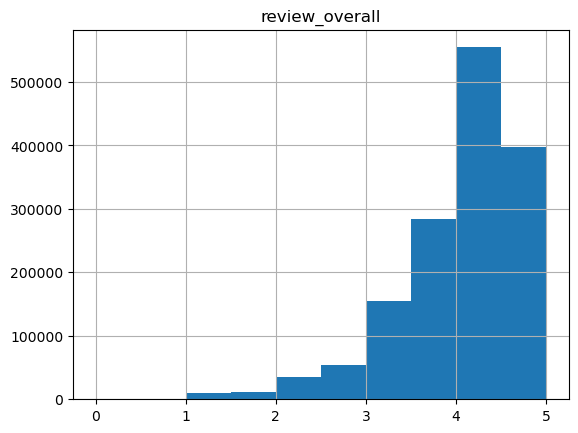

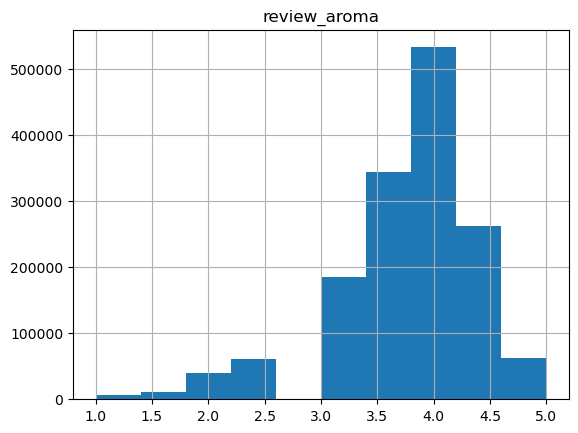

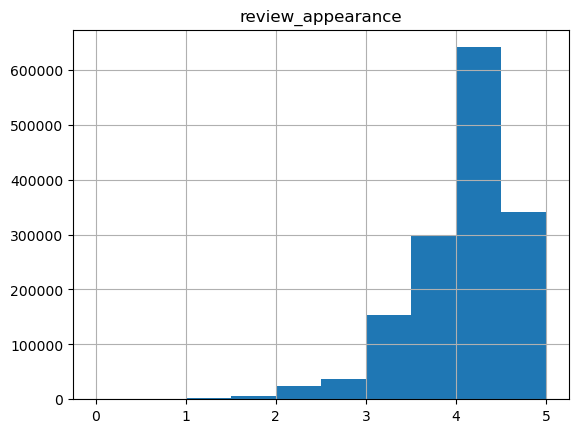

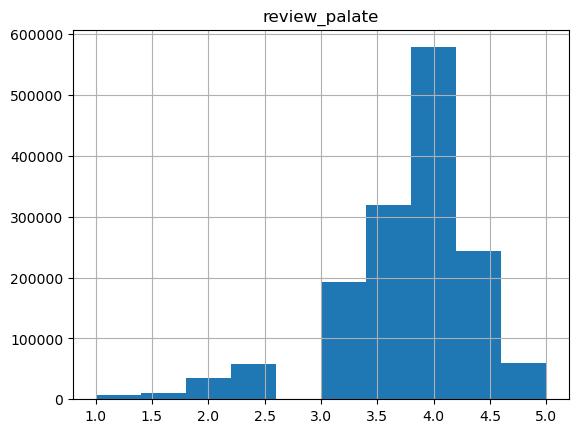

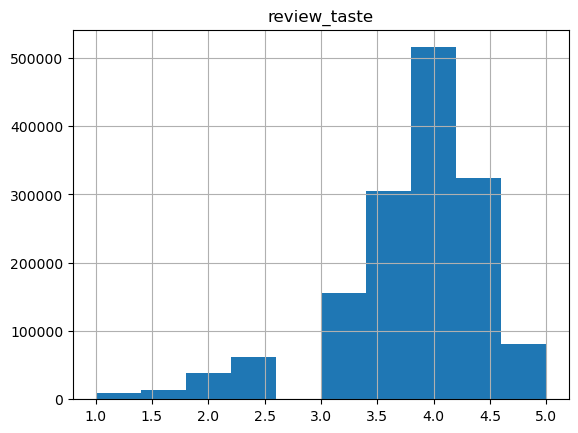

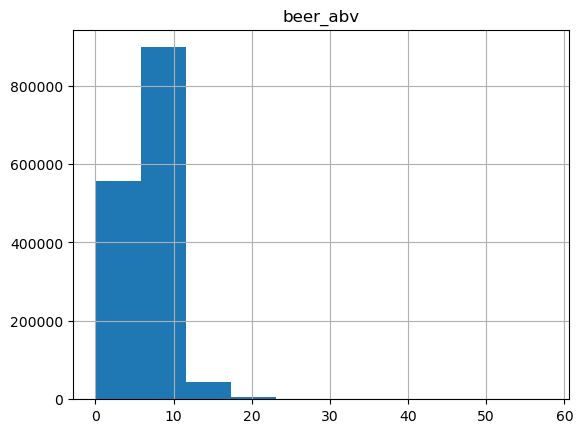

In [45]:
value_cols = ["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste", "beer_abv"]
for col in value_cols:
    df_final.hist(col)

beer_abv obviously has a large upper outlier. Also, reviewing BeerAdvocate reveals that review scores range from 1 - 5, so all 0 scores are outliers

In [46]:
print(7.043460 + (3 * 2.323306))
print(7.043460 + (5 * 2.323306))

14.013378
18.65999


In [47]:
# using 3 std. for determining outliers for beer_abv
df_final[df_final["beer_abv"] > 7.043460 + (5 * 2.323306)]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
284158,35,Boston Beer Company (Samuel Adams),1002499201,5.0,4.5,3.0,Todd,American Strong Ale,5.0,5.0,Samuel Adams Millennium,21.0,1640
284157,35,Boston Beer Company (Samuel Adams),1002561805,5.0,5.0,5.0,gwfrankpsu,American Strong Ale,5.0,5.0,Samuel Adams Millennium,21.0,1640
297558,35,Boston Beer Company (Samuel Adams),1018096849,5.0,5.0,5.0,Jdiddy,American Strong Ale,5.0,5.0,Samuel Adams Utopias MMII,24.0,2683
297557,35,Boston Beer Company (Samuel Adams),1020435007,4.5,4.5,4.5,Andy,American Strong Ale,5.0,5.0,Samuel Adams Utopias MMII,24.0,2683
297556,35,Boston Beer Company (Samuel Adams),1024310446,4.5,5.0,5.0,jackndan,American Strong Ale,5.0,5.0,Samuel Adams Utopias MMII,24.0,2683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993808,15237,De Struise Brouwers,1326082073,4.5,4.5,4.5,drabmuh,American Double / Imperial Stout,4.5,4.0,Black Damnation V - Double Black,26.0,56776
996003,15237,De Struise Brouwers,1326106103,4.5,5.0,5.0,PapaEugene,Russian Imperial Stout,5.0,4.5,Black Damnation XI - Special Kay,22.0,44605
1375144,4738,Grand Lake Brewing Company,1326109900,3.0,3.5,3.0,spdyfire83,American Strong Ale,3.5,3.0,Holy Grail,20.0,40351
993807,15237,De Struise Brouwers,1326125617,5.0,4.5,5.0,spdyfire83,American Double / Imperial Stout,4.5,5.0,Black Damnation V - Double Black,26.0,56776


After some research, the ridiculously large abv outliers are actual real beers.  
Still need to cut out outliers for accurate modelling with abv.  
Potential cutoffs:  
3 std. dev. - 14.01  
5 std. dev. - 18.66  
Sam Adams Utopias 2017 - 28

In [48]:
df_final = df_final.query("review_overall > 0 and review_appearance > 0 and beer_abv < 14.01")

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1489428 entries, 764128 to 551371
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1489428 non-null  int64  
 1   brewery_name        1489428 non-null  object 
 2   review_time         1489428 non-null  int64  
 3   review_overall      1489428 non-null  float64
 4   review_aroma        1489428 non-null  float64
 5   review_appearance   1489428 non-null  float64
 6   review_profilename  1489428 non-null  object 
 7   beer_style          1489428 non-null  object 
 8   review_palate       1489428 non-null  float64
 9   review_taste        1489428 non-null  float64
 10  beer_name           1489428 non-null  object 
 11  beer_abv            1489428 non-null  float64
 12  beer_beerid         1489428 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 159.1+ MB


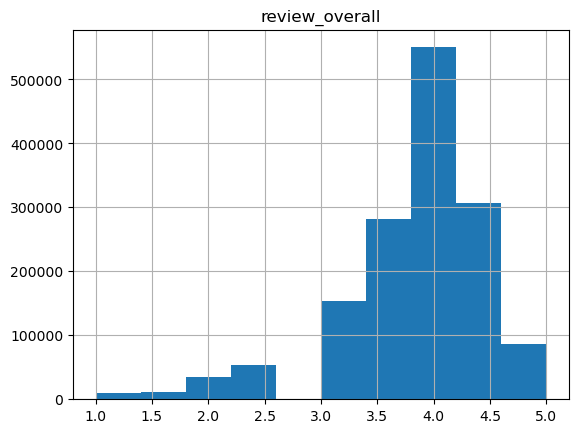

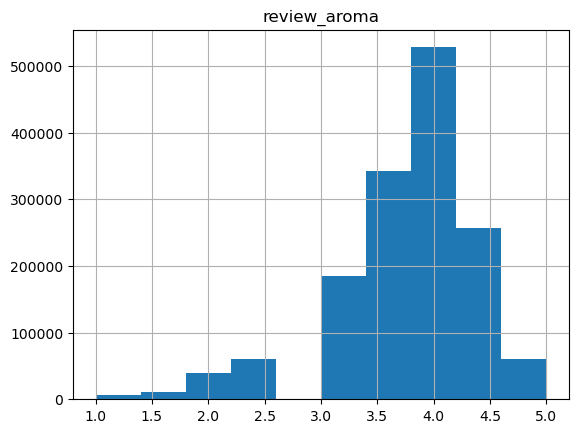

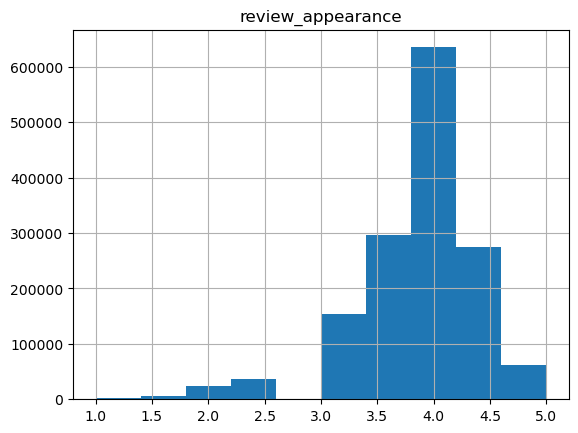

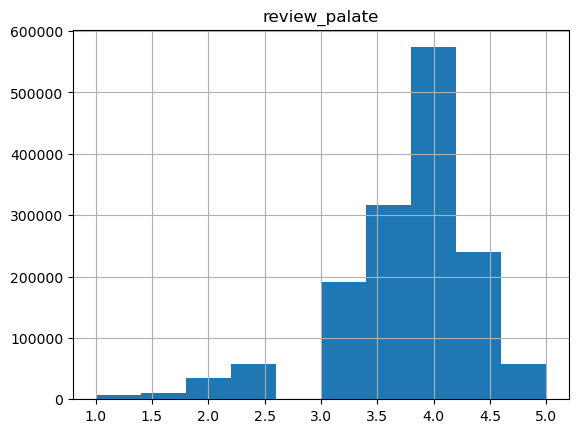

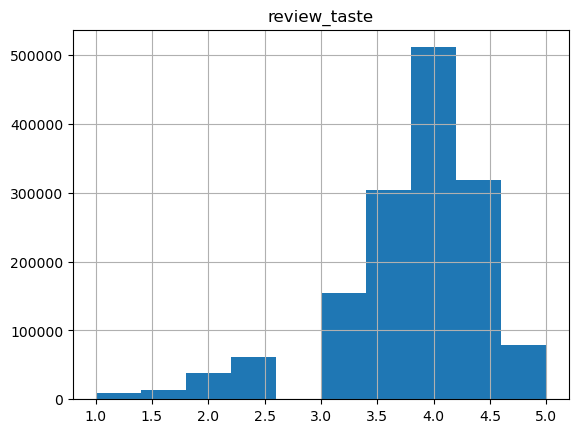

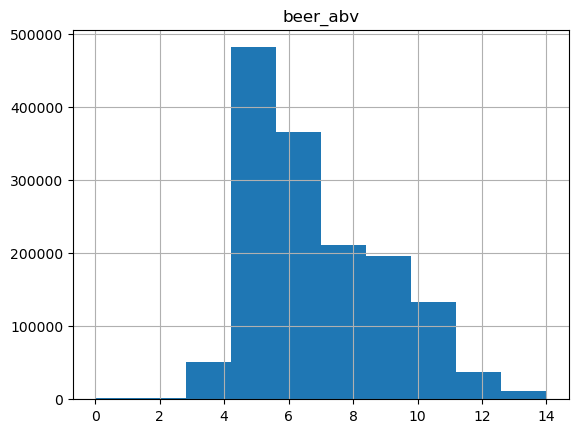

In [50]:
for col in value_cols:
    df_final.hist(col)

In [51]:
df_final.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.489428e+06,1.489428e+06,1.489428e+06,1.489428e+06,1.489428e+06,1.489428e+06,1.489428e+06,1.489428e+06,1.489428e+06
mean,3.042554e+03,1.225494e+09,3.823240e+00,3.741726e+00,3.847874e+00,3.749954e+00,3.799880e+00,6.944488e+00,2.145299e+04
std,5.530976e+03,7.578802e+07,7.151378e-01,6.941210e-01,6.140172e-01,6.779735e-01,7.270947e-01,2.082946e+00,2.181191e+04
min,1.000000e+00,8.846496e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,5.000000e+00
25%,1.410000e+02,1.175740e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.639000e+03
50%,4.130000e+02,1.240529e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.314200e+04
75%,2.210000e+03,1.289218e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.929600e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.400000e+01,7.731600e+04


Why is there a gap in the ratings between 2.5 and 3?

In [52]:
# df_final["review_overall"].plot(kind="kde")   takes a minute, skip this in the future
print(df_final)

         brewery_id               brewery_name  review_time  review_overall  \
764128          144   Sprecher Brewing Company    884649601             4.5   
1417077         139       Shipyard Brewing Co.    885340801             4.0   
78405           140  Sierra Nevada Brewing Co.    886723201             4.5   
1526516          45           Brooklyn Brewery    887155201             4.0   
1526153          45           Brooklyn Brewery    887414401             3.0   
...             ...                        ...          ...             ...   
562035          423      Boulevard Brewing Co.   1326274454             4.5   
1153730         454    Arcadia Brewing Company   1326275049             4.0   
400524          694     Tröegs Brewing Company   1326276656             4.0   
551392        22194          Flat Tail Brewing   1326284970             3.5   
551371        22194          Flat Tail Brewing   1326285348             4.0   

         review_aroma  review_appearance review_pro

Just an issue with the histogram, entries at every integer [1, 5] and inbetween each int at x.5

## Review Correlations

In [53]:
# Pearson (linear) and Spearman (monotonic) correlations of review ratings and beer_abv
pear_corr = df_final[value_cols].corr("pearson")
pear_corr

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_overall,1.000000,0.614445,0.499735,0.700168,0.788501,0.164018
review_aroma,0.614445,1.000000,0.558933,0.613890,0.714086,0.351030
review_appearance,0.499735,0.558933,1.000000,0.564042,0.544435,0.283644
review_palate,0.700168,0.613890,0.564042,1.000000,0.731471,0.306378
review_taste,0.788501,0.714086,0.544435,0.731471,1.000000,0.311357
beer_abv,0.164018,0.351030,0.283644,0.306378,0.311357,1.000000


In [54]:
spear_corr = df_final[value_cols].corr("spearman")
spear_corr

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_overall,1.000000,0.555963,0.452088,0.651270,0.728198,0.178165
review_aroma,0.555963,1.000000,0.494199,0.560343,0.666326,0.380095
review_appearance,0.452088,0.494199,1.000000,0.510516,0.489847,0.307499
review_palate,0.651270,0.560343,0.510516,1.000000,0.684056,0.331164
review_taste,0.728198,0.666326,0.489847,0.684056,1.000000,0.345698
beer_abv,0.178165,0.380095,0.307499,0.331164,0.345698,1.000000


In [83]:
def heatmap_from_df(df: pd.DataFrame, title: str, save_path: str):
    ax = sb.heatmap(df, cmap="coolwarm", annot=True, fmt='.2f', vmin=0, vmax=1)
    ax.xaxis.tick_top()
    ax.tick_params(axis='x', rotation=60, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    ax.set_title(title)
    plt.tight_layout()
    ax.get_figure().savefig(save_path, dpi=400)
    plt.show()
    plt.close()

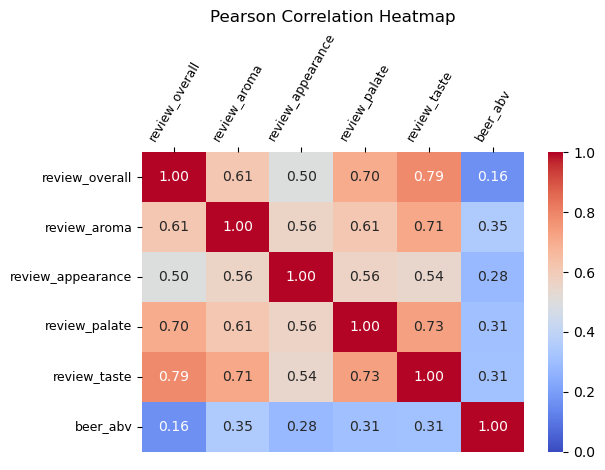

In [84]:
heatmap_from_df(pear_corr, "Pearson Correlation Heatmap", "figures/pearson-heatmap.png")

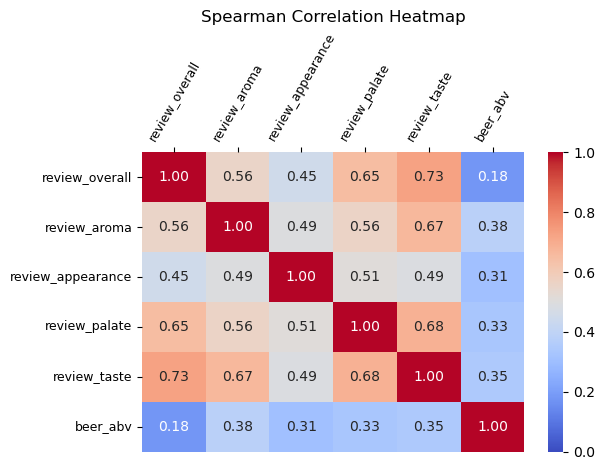

In [85]:
heatmap_from_df(spear_corr, "Spearman Correlation Heatmap", "figures/spearman-heatmap.png")

Next steps:  
One-hot encoding for beer types  
2D plot of overall review per beer by beer type and by user and by brewery (cluster analysis)  
Text analysis of beer names and brewery names for review? (deep learning)  
PCA dimensionality reduction

## Cluster Analysis